<a href="https://colab.research.google.com/github/wakoIniad/autoge/blob/main/auto_ge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/for-my-game/PMEmo2019.zip

Archive:  /content/drive/MyDrive/for-my-game/PMEmo2019.zip
   creating: PMEmo2019/
   creating: PMEmo2019/lyrics/
  inflating: PMEmo2019/lyrics/755.lrc  
   creating: __MACOSX/
   creating: __MACOSX/PMEmo2019/
   creating: __MACOSX/PMEmo2019/lyrics/
  inflating: __MACOSX/PMEmo2019/lyrics/._755.lrc  
  inflating: PMEmo2019/lyrics/769.lrc  
  inflating: __MACOSX/PMEmo2019/lyrics/._769.lrc  
  inflating: PMEmo2019/lyrics/796.lrc  
  inflating: PMEmo2019/lyrics/966.lrc  
  inflating: PMEmo2019/lyrics/225.lrc  
  inflating: PMEmo2019/lyrics/219.lrc  
  inflating: PMEmo2019/lyrics/580.lrc  
  inflating: PMEmo2019/lyrics/351.lrc  
  inflating: PMEmo2019/lyrics/379.lrc  
  inflating: PMEmo2019/lyrics/392.lrc  
  inflating: PMEmo2019/lyrics/147.lrc  
  inflating: __MACOSX/PMEmo2019/lyrics/._147.lrc  
  inflating: PMEmo2019/lyrics/621.lrc  
  inflating: PMEmo2019/lyrics/635.lrc  
  inflating: PMEmo2019/lyrics/153.lrc  
  inflating: __MACOSX/PMEmo2019/lyrics/._153.lrc  
  inflating: PMEmo2019/lyr

In [ ]:
メモ：
EDAは、イベントの発生位置に使い、感情価・覚醒度はイベントの種類に使う。

まずは、実際の音と各反応の関係をディープラーニング（？）で調べる。

EDAの行のラベルのうちtime以外の1000222などは、被験者の番号でほぼ確定。（根拠：被験者が男女合わせて500人ほどで、その数字は100000~1004xxの範囲だったから）
->確定（よく見たらreadmeに書いてあった）

感情価の平均のデータと標準偏差のデータ：
平均：感情値自体？
標準偏差：短期間での感情の変化＝感情の揺さぶり？

In [ ]:
import csv
DATA_DIR_PATH = '/content/PMEmo2019'

def loadDataPack(id):
  soundPath = f"{DATA_DIR_PATH}/chorus/{id}.mp3"
  edaPath = f"{DATA_DIR_PATH}/EDA/{id}_EDA.csv"


In [ ]:
import csv
DATA_DIR_PATH = '/content/PMEmo2019'

arousalStd = open('/content/PMEmo2019/annotations/dynamic_annotations_std.csv', encoding='utf-8')
arousalStdReader = csv.DictReader(arousalStd)

valence = open('/content/PMEmo2019/annotations/dynamic_annotations.csv', encoding='utf-8')
valenceReader = csv.DictReader(valence)

sumArousal = 0
sumValence = 0

ca = 0
cb = 0

aa = []
vv = []

for row in arousalStdReader:
  aa.append(row)
  sumArousal += float(row['Arousal(std)'])
  ca+=1

for row in valenceReader:
  vv.append(row)
  sumValence += float(row['Valence(mean)'])
  cb+=1

avArousal = sumArousal/ca
avValence = sumValence/cb

sumArousal = 0
sumValence = 0
sumForCov = 0
for [a,v] in zip(aa,vv):
  ar = (float(a['Arousal(std)'])-avArousal)
  va = (float(v['Valence(mean)'])-avValence)
  sumArousal += ar**2
  sumValence += va**2
  sumForCov += ar * va
arousalStd = (sumArousal/ca)**0.5
valenceStd = (sumValence/ca)**0.5
cov = sumForCov/ca
print(cov,arousalStd,valenceStd)
print(cov/(arousalStd*valenceStd))
#-> -0.4652952277549563: 非常に弱い負の相関

print(ca,cb)

-0.007155596006191354 0.09605858681599087 0.160096199203893
-0.4652952277549563
36434 36434


＜重要＞価と覚醒度の両方で非常に高い結果

---

が出たことは、収集された注釈の優れた内部

---

一貫性を間接的に示しています。

からの引用：https://dl.acm.org/doi/pdf/10.1145/3206025.3206037?casa_token=QG3juu3PuZ4AAAAA:ZIUgiSRUM57yyr4fRSrHvnsMdu44lou6tEHmNCZwS16yO1KItwE11EVugHpr_8M_VZX8Hew2dMHkXA


We use the Cronbach’s α [13] to evaluate annotation consistency.
Cronbach’s α is often used in psychometric test to estimate the reliability that represents the degree to which a set of items measures a
single unidimensional latent construct. In this article, we compute
the Cronbach’s α on the sequences of annotations for each song.
Annotations are sampled in 2Hz and as what is usually done to
normalize the continuous annotations [2], we process the annotations by
aj,i = aj,i + (Aj − A) (1)
where aj,i
is the label annotated by subject j at time i, and A is
the mean of all the labels for this song by all subjects while Aj
is
the mean of dynamic labels by subject j.
Oral Session 2: Multimedia Content Analysis ICMR’18, June 11-14, 2018, Yokohama, Japan 138
Table 3 shows the mean (averaged across songs) and the standard
deviation of Cronbach’s α for the annotations in the PMEmo dataset.
The quite high results for both valence and arousal indirectly indicate excellent internal consistency of the collected annotations.

In [ ]:
import csv
import numpy as np
import math
DATA_DIR_PATH = '/content/PMEmo2019'

std = open('/content/PMEmo2019/annotations/dynamic_annotations_std.csv', encoding='utf-8')
stdReader = csv.DictReader(std)

nomal = open('/content/PMEmo2019/annotations/dynamic_annotations.csv', encoding='utf-8')
normalReader = csv.DictReader(nomal)
print(type(normalReader))
print(list(normalReader))

std = [list(row.values()) for row in stdReader]
normal = [list(row.values()) for row in normalReader]
#print(std)
avDiff = [float(row[2]) - float(row[3]) for row in normal]
mStd = [(float(row[2]) + float(row[3])/2) for row in std]

stdA = 0.13168391210041325#np.std(avDiff,ddof=0);
stdB = 0.15177601868768012#np.std(mStd,ddof=0);
#0.13168391210041325 0.15177601868768012

_av = 0.025893759512842656
_std = 0.4483567733612863
sum = 0
#print(np.mean(avDiff),np.mean(mStd))
for [av,std] in zip(avDiff,mStd):
  sum += (av-_av)*(std-_std)
cov = sum/len(mStd)

#cov = np.cov(list(zip(avDiff,mStd)),rowvar=False);
print(cov/(stdA*stdB))
print(len(avDiff),len(mStd))


<class 'csv.DictReader'>
[{'musicId': '1', 'frameTime': '15.5', 'Arousal(mean)': '0.4376625', 'Valence(mean)': '0.5599749999999999'}, {'musicId': '1', 'frameTime': '16.0', 'Arousal(mean)': '0.437775', 'Valence(mean)': '0.5606499999999999'}, {'musicId': '1', 'frameTime': '16.5', 'Arousal(mean)': '0.4431250000000001', 'Valence(mean)': '0.5598999999999998'}, {'musicId': '1', 'frameTime': '17.0', 'Arousal(mean)': '0.4428875', 'Valence(mean)': '0.5602124999999999'}, {'musicId': '1', 'frameTime': '17.5', 'Arousal(mean)': '0.4445625', 'Valence(mean)': '0.5633374999999998'}, {'musicId': '1', 'frameTime': '18.0', 'Arousal(mean)': '0.4516625', 'Valence(mean)': '0.5691124999999999'}, {'musicId': '1', 'frameTime': '18.5', 'Arousal(mean)': '0.452', 'Valence(mean)': '0.5726624999999999'}, {'musicId': '1', 'frameTime': '19.0', 'Arousal(mean)': '0.450775', 'Valence(mean)': '0.5747749999999999'}, {'musicId': '1', 'frameTime': '19.5', 'Arousal(mean)': '0.4495375', 'Valence(mean)': '0.5828874999999999'},

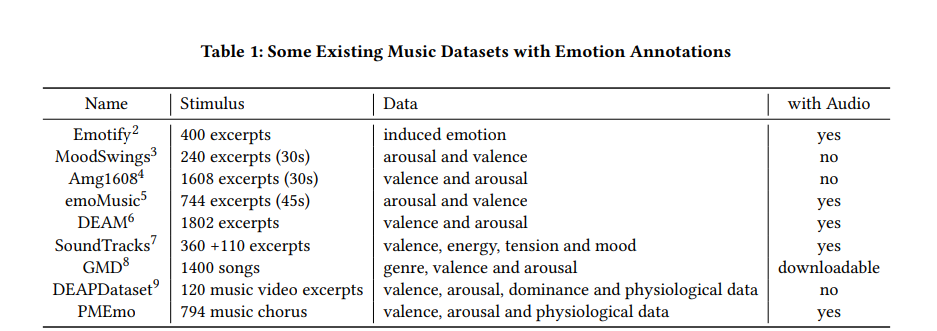

/content/PMEmo2019/chorus/50.mp3
[[0.51821774 0.59328485 0.40820768 ... 0.26344675 0.21361622 0.18082641]
 [0.3275628  0.41182446 0.31794387 ... 0.18493542 0.21433115 0.1970564 ]
 [0.5058154  0.40579233 0.25770798 ... 0.265287   0.35515928 0.34455365]
 ...
 [0.5057071  0.74318796 0.72244906 ... 0.19675197 0.2513258  0.26317513]
 [0.9805807  0.8501732  0.44401887 ... 0.19063692 0.19278863 0.14960793]
 [0.87006974 0.9518149  0.49479353 ... 0.15313339 0.18582712 0.14830147]]



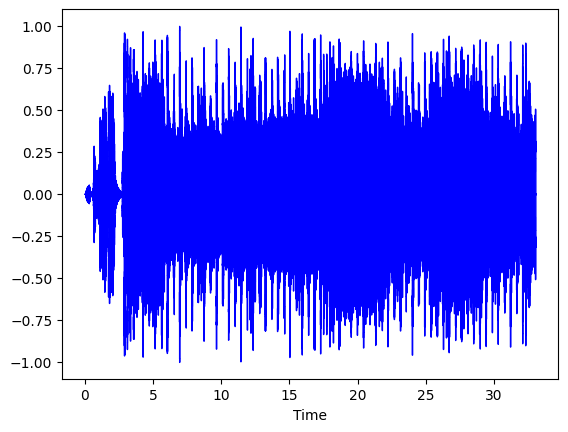

<Figure size 1200x400 with 0 Axes>

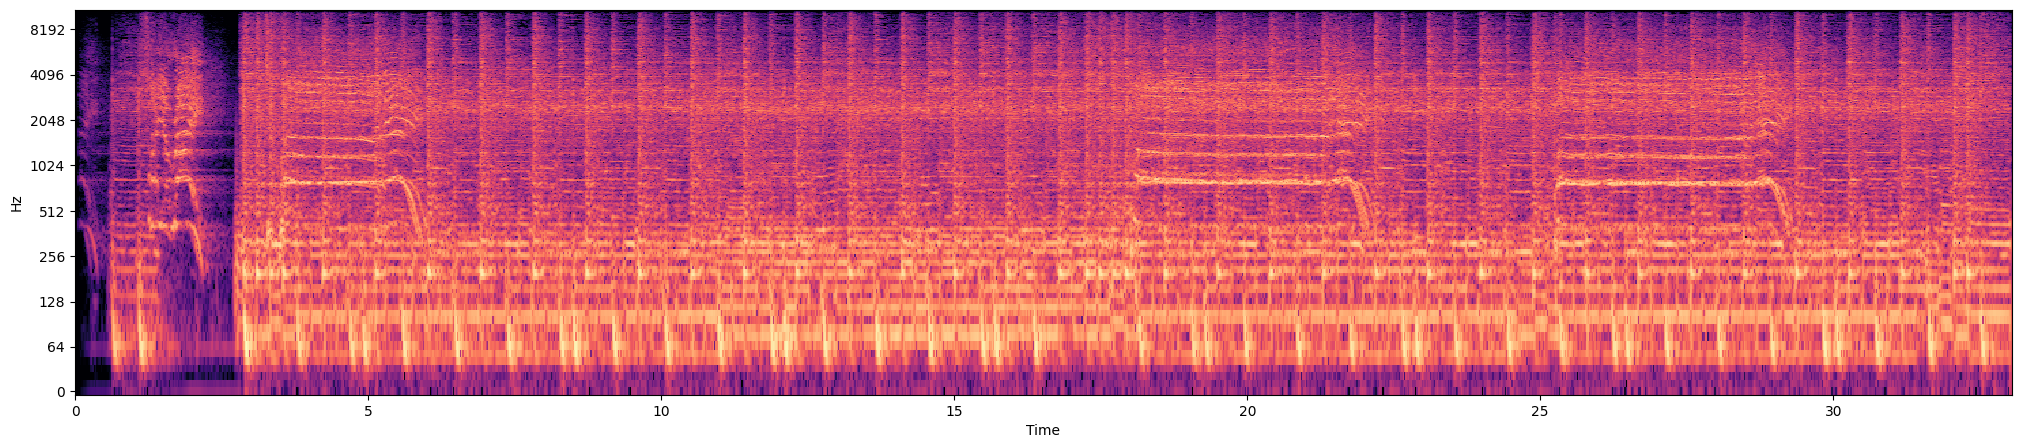

In [ ]:
import csv
import numpy as np
import math

import librosa
import librosa.display

import matplotlib.pyplot as plt


DATA_DIR_PATH = '/content/PMEmo2019'

def loadDataPack(id):
  edaPath = f"{DATA_DIR_PATH}/EDA/{id}_EDA.csv"
  edaReader = csv.DictReader(edaPath)

  soundPath = f"{DATA_DIR_PATH}/chorus/{id}.mp3"
  print(soundPath)
  y, sr = librosa.load(soundPath)
  librosa.display.waveshow(y=y, sr=sr, color='blue')
  #/content/PMEmo2019/chorus/101.mp3
  #/content/PMEmo2019/chorus/100.mp3
  n_mfcc = 20
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, dct_type=3)

  print(mfcc)
  #librosa.display.specshow(mfcc, sr=sr, x_axis='time')

  C = librosa.feature.chroma_cqt(y=y, sr=sr)
  print(C)
  plt.figure(figsize=(12,4))
  #librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
  ###plt.title('Chromagram')
  ###plt.colorbar()
  ###plt.tight_layout()

  stft_result = librosa.stft(y)
  abs_result = np.abs(stft_result)
  power_spec = librosa.amplitude_to_db(abs_result, ref=np.max)

  plt.figure(figsize=(25,5))
  librosa.display.specshow(power_spec, y_axis='log', x_axis='time', sr = sr)

  print(power_spec)
  ##plt.title('Power Spectrogram')
  ##plt.colorbar(format='%+2.0f dB')

  ##plt.tight_layout()
  ##plt.show()

loadDataPack(50)

/content/PMEmo2019/chorus/50.mp3
[[-4.9276328e+02 -4.9276328e+02 -4.2393463e+02 ... -2.2197002e+01
  -3.3294518e+01 -1.1304543e+02]
 [ 1.6257233e+02  1.6257233e+02  1.3805791e+02 ...  6.1742317e+01
   7.0752197e+01  1.0401245e+02]
 [-9.9522430e+01 -9.9522430e+01 -1.2438347e+02 ... -1.9228783e+00
  -6.1158562e+00 -2.0208836e+01]
 ...
 [ 1.2577633e+01  1.2577633e+01  3.0404848e+01 ...  1.2274010e+01
   1.5353287e+01  2.1006943e+01]
 [-1.4304546e+01 -1.4304546e+01 -1.5073637e+01 ...  1.6642346e+00
   4.2953348e-01 -3.2806005e+00]
 [ 1.1112343e+01  1.1112343e+01  1.5973978e+00 ...  8.8601017e+00
   9.9349003e+00  9.8041677e+00]]
[[0.51821774 0.59328485 0.40820768 ... 0.26344675 0.21361622 0.18082641]
 [0.3275628  0.41182446 0.31794387 ... 0.18493542 0.21433115 0.1970564 ]
 [0.5058154  0.40579233 0.25770798 ... 0.265287   0.35515928 0.34455365]
 ...
 [0.5057071  0.74318796 0.72244906 ... 0.19675197 0.2513258  0.26317513]
 [0.9805807  0.8501732  0.44401887 ... 0.19063692 0.19278863 0.1496079

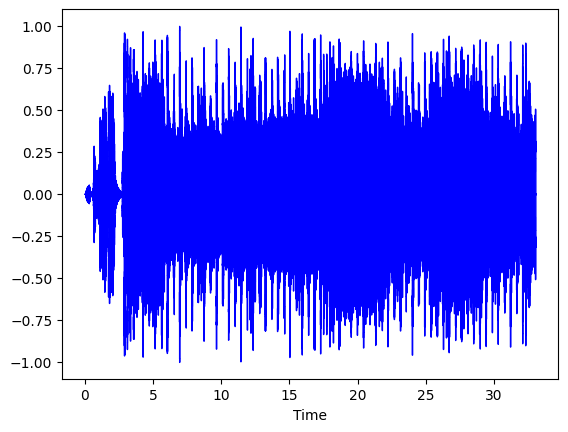

<Figure size 1200x400 with 0 Axes>

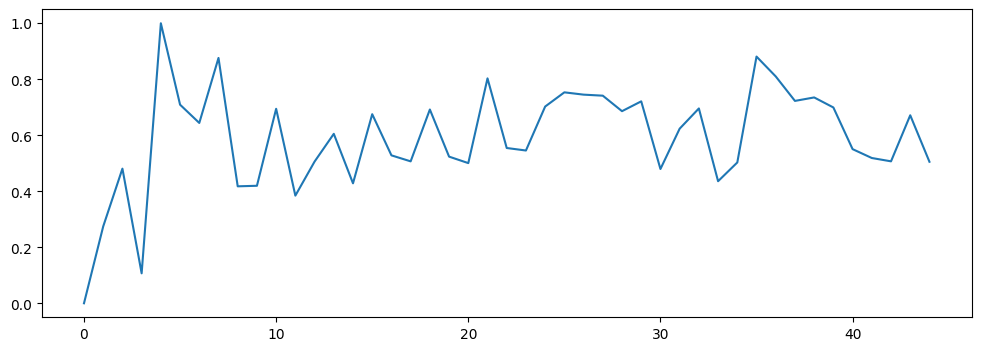

<Figure size 2500x500 with 0 Axes>

In [ ]:
import csv
import numpy as np
import math

import librosa
import librosa.display

import matplotlib.pyplot as plt


DATA_DIR_PATH = '/content/PMEmo2019'

def loadDataPack(id):
  edaPath = f"{DATA_DIR_PATH}/EDA/{id}_EDA.csv"
  edaReader = csv.DictReader(edaPath)

  soundPath = f"{DATA_DIR_PATH}/chorus/{id}.mp3"
  print(soundPath)
  y, sr = librosa.load(soundPath)
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

  librosa.display.waveshow(y=y, sr=sr, color='blue')
  #/content/PMEmo2019/chorus/101.mp3
  #/content/PMEmo2019/chorus/100.mp3
  n_mfcc = 20
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, dct_type=3)
  print(mfcc) #音色

  C = librosa.feature.chroma_cqt(y=y, sr=sr)
  plt.figure(figsize=(12,4))
  print(C) #和音


  rms = librosa.feature.rms(y=y, hop_length=16250)[0]
  rms /= np.max(rms) #正規化
  print(rms) #音圧

  times = np.floor(librosa.times_like(rms, hop_length=16250, sr=sr))

  plt.figure(figsize=(12, 4))
  plt.plot(rms)


  spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
  spectral_centroid = np.convolve(spectral_centroid, np.ones(200)/200, mode='valid')

  print(spectral_centroid) #音程

  stft_result = librosa.stft(y)
  abs_result = np.abs(stft_result)
  power_spec = librosa.amplitude_to_db(abs_result, ref=np.max)

  plt.figure(figsize=(25,5))
  #librosa.display.specshow(power_spec, y_axis='log', x_axis='time', sr = sr)

  print(power_spec) #構成(フーリエ変換)

loadDataPack(50)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


[[-3.6742446  4.362977 ]
 [-3.4868422  4.1373787]
 [-3.388849   4.0266404]
 [-3.4250877  4.0602098]
 [-3.6494155  4.3347025]
 [-4.061432   4.8061256]
 [-3.4413748  4.0874114]
 [-3.6621494  4.342357 ]
 [-3.2446287  3.8511071]
 [-3.5492663  4.2067766]
 [-3.8992114  4.6245046]
 [-3.6252246  4.2934628]
 [-3.432992   4.0742483]
 [-3.0849319  3.6587136]
 [-4.0085244  4.7521935]
 [-4.1891627  4.9722395]
 [-3.8729765  4.5916624]
 [-3.683588   4.373683 ]
 [-4.1659327  4.928542 ]
 [-3.7947106  4.5020876]
 [-3.9443574  4.663964 ]
 [-3.7843761  4.4886436]
 [-3.3203402  3.928125 ]
 [-3.8191874  4.514659 ]
 [-3.7814932  4.4613266]
 [-3.635528   4.301712 ]
 [-3.7329254  4.419724 ]
 [-3.7708411  4.4713554]
 [-3.6990743  4.3912516]
 [-3.5413623  4.1927385]
 [-3.5661917  4.221013 ]
 [-3.8588643  4.5734673]
 [-3.8795645  4.6055493]
 [-3.9900174  4.741724 ]
 [-3.558609   4.217483 ]
 [-3.4882293  4.136395 ]
 [-3.8078156  4.520307 ]
 [-3.5955653  4.271572 ]
 [-3.214004   3.820143 ]
 [-3.7066565  4.3947816]


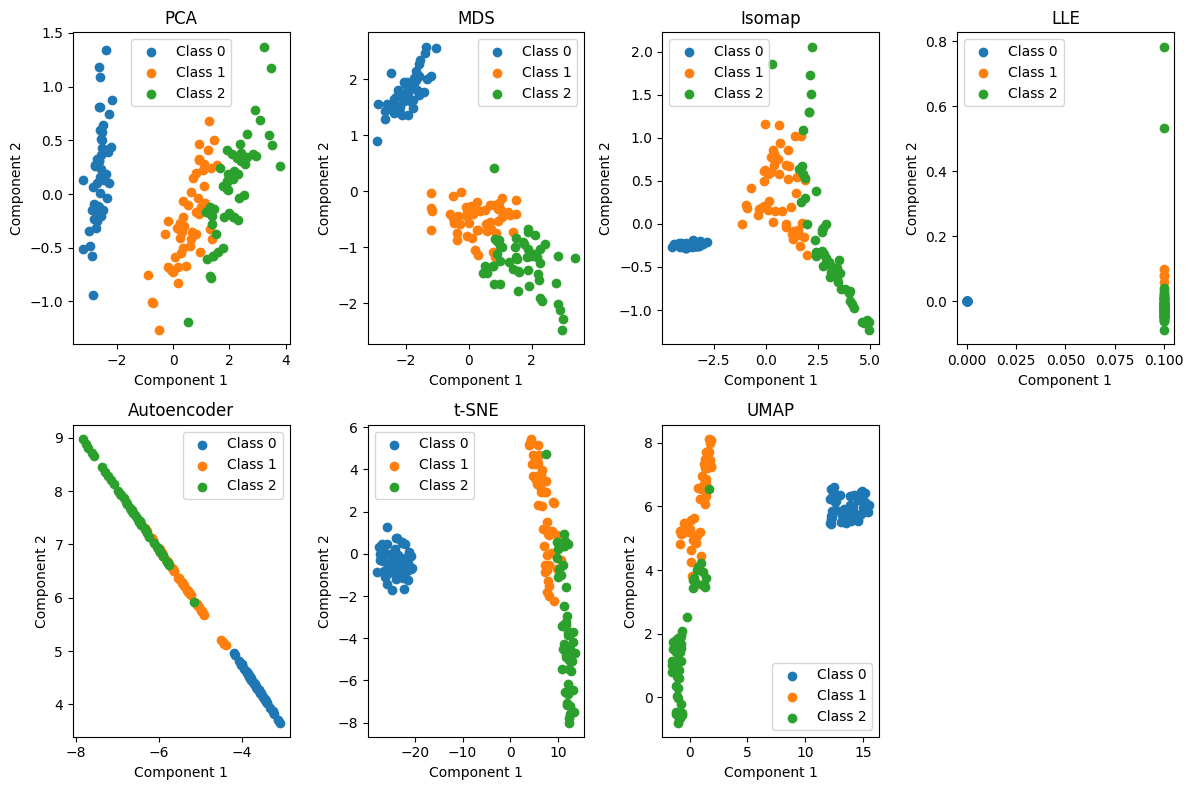

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
import torch
import torch.nn as nn
import torch.optim as optim
import umap.umap_ as UMAP
import matplotlib.pyplot as plt

def perform_dimensionality_reduction(X, method, n_components=2, **kwargs):
    # 次元削減手法を選択し、適用する関数
    if method == 'PCA':
        reducer = PCA(n_components=n_components)  # 主成分分析(PCA)
    elif method == 'MDS':
        reducer = MDS(n_components=n_components)  # 多次元尺度構成法(MDS)
    elif method == 'Isomap':
        reducer = Isomap(n_components=n_components)  # Isomap
    elif method == 'LLE':
        reducer = LocallyLinearEmbedding(n_components=n_components)  # 局所線形埋め込み(LLE)
    elif method == 't-SNE':
        reducer = TSNE(n_components=n_components)  # t-SNE
    elif method == 'UMAP':
        reducer = UMAP.UMAP(n_components=n_components)  # UMAP
    else:
        raise ValueError(f"Unknown dimensionality reduction method: {method}")

    return reducer.fit_transform(X)

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(4, 8),  # 入力層から隠れ層へ
            nn.ReLU(),        # ReLU活性化関数
            nn.Linear(8, 2)   # 隠れ層からコード層へ
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 8),  # コード層から隠れ層へ
            nn.ReLU(),        # ReLU活性化関数
            nn.Linear(8, 4)   # 隠れ層から出力層へ
        )

    def forward(self, x):
        x = self.encoder(x)  # エンコード処理
        x = self.decoder(x)  # デコード処理
        return x

def train_autoencoder(X, model, epochs=50, batch_size=32):
    dataset = torch.tensor(X, dtype=torch.float32)  # データセットをテンソルに変換
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)  # データローダの設定
    criterion = nn.MSELoss()  # 損失関数としてMSEを使用
    optimizer = optim.Adam(model.parameters(), lr=0.01)  # 最適化アルゴリズムとしてAdamを使用

    # 訓練ループ
    for epoch in range(epochs):
        for data in dataloader:
            optimizer.zero_grad()  # 勾配を0で初期化
            reconstruction = model(data)  # データを通じて再構成
            loss = criterion(reconstruction, data)  # 損失の計算
            loss.backward()  # 勾配の計算
            optimizer.step()  # パラメータの更新

    encoded_data = model.encoder(dataset).detach().numpy()  # エンコーダの出力を取得し、Numpy配列に変換
    return encoded_data

def plot_results(X_reduced_list, y, methods):
    plt.figure(figsize=(12, 8))  # 図のサイズを指定

    # 結果を一つずつプロット
    for i, (method, X_reduced) in enumerate(zip(methods, X_reduced_list), 1):
        plt.subplot(2, 4, i)
        for label in np.unique(y):
            plt.scatter(X_reduced[y == label, 0], X_reduced[y == label, 1], label=f'Class {label}')  # ラベルごとに色を変えてプロット
        plt.title(f'{method}')  # サブプロットのタイトル
        plt.xlabel('Component 1')  # X軸ラベル
        plt.ylabel('Component 2')  # Y軸ラベル
        plt.legend()  # 凡例の表示

    plt.tight_layout()  # レイアウトの調整
    plt.show()

def main():
    iris = load_iris()  # Irisデータセットの読み込み
    X = iris.data
    y = iris.target
    print(X,X.shape)

    methods = ['PCA', 'MDS', 'Isomap', 'LLE', 't-SNE', 'UMAP']
    X_reduced_list = [perform_dimensionality_reduction(X, method) for method in methods]  # 様々な次元削減手法を適用

    autoencoder = Autoencoder()  # オートエンコーダモデルのインスタンス化
    X_autoencoder = train_autoencoder(X, autoencoder)  # オートエンコーダでの学習
    X_reduced_list.insert(4, X_autoencoder)
    methods.insert(4, 'Autoencoder')
    print(X_autoencoder,X_autoencoder.shape)
    plot_results(X_reduced_list, y, methods)  # 結果のプロット

if __name__ == '__main__':
    main()



In [ ]:
import csv
import numpy as np
import math

import librosa
import librosa.display

import matplotlib.pyplot as plt


DATA_DIR_PATH = '/content/PMEmo2019'

def sprint(c):
  print(c.shape,len(c),type(c))

def repeat_expand(data, target_shape):
    rows, cols = target_shape
    if len(data.shape) == 1:
        data = data[:, np.newaxis]
    orig_rows, orig_cols = data.shape
    row_indices = np.floor(np.linspace(0, orig_rows, rows, endpoint=False)).astype(int)
    col_indices = np.floor(np.linspace(0, orig_cols, cols, endpoint=False)).astype(int)
    expanded_data = data[row_indices][:, col_indices]

    return expanded_data

def unify_shapes(*datasets):
    # 各データの行数と列数を比較して、最大の形状を決定
    max_rows = max([data.shape[0] for data in datasets])
    max_cols = max([data.shape[1] if len(data.shape) > 1 else 1 for data in datasets])

    # 全てのデータの形状を最大の形状に揃える
    expanded_datasets = [repeat_expand(data, (max_rows, max_cols)) for data in datasets]

    return expanded_datasets


def loadDataPack(id):
  edaPath = f"{DATA_DIR_PATH}/EDA/{id}_EDA.csv"
  edaReader = csv.DictReader(edaPath)

  soundPath = f"{DATA_DIR_PATH}/chorus/{id}.mp3"
  print(soundPath)
  y, sr = librosa.load(soundPath)
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
  sprint(mel_spectrogram) #リズム

  #librosa.display.waveshow(y=y, sr=sr, color='blue')
  #/content/PMEmo2019/chorus/101.mp3
  #/content/PMEmo2019/chorus/100.mp3
  n_mfcc = 20
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, dct_type=3)
  sprint(mfcc) #音色
  #print(mfcc)

  C = librosa.feature.chroma_cqt(y=y, sr=sr)
  plt.figure(figsize=(12,4))
  sprint(C) #和音


  rms = librosa.feature.rms(y=y, hop_length=16250)[0]
  rms /= np.max(rms) #正規化
  sprint(rms) #音圧
  #print(rms)

  #times = np.floor(librosa.times_like(rms, hop_length=16250, sr=sr))

  #plt.figure(figsize=(12, 4))
  #plt.plot(rms)


  spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
  spectral_centroid = np.convolve(spectral_centroid, np.ones(200)/200, mode='valid')

  sprint(spectral_centroid) #音程

  stft_result = librosa.stft(y)
  abs_result = np.abs(stft_result)
  power_spec = librosa.amplitude_to_db(abs_result, ref=np.max)

  plt.figure(figsize=(25,5))

  sprint(power_spec) #構成(フーリエ変換)/ 準候補

  resized_data = unify_shapes(mel_spectrogram,mfcc,C,rms,spectral_centroid,power_spec)

  # 結果を表示
  for i, data in enumerate(resized_data):
    print(f"Data {i+1} original shape -> resized shape: {data.shape}")

loadDataPack(50)

/content/PMEmo2019/chorus/50.mp3
(128, 1424) 128 <class 'numpy.ndarray'>
(20, 1424) 20 <class 'numpy.ndarray'>
(12, 1424) 12 <class 'numpy.ndarray'>
(45,) 45 <class 'numpy.ndarray'>
(1225,) 1225 <class 'numpy.ndarray'>
(1025, 1424) 1025 <class 'numpy.ndarray'>
Data 1 original shape -> resized shape: (1225, 1424)
Data 2 original shape -> resized shape: (1225, 1424)
Data 3 original shape -> resized shape: (1225, 1424)
Data 4 original shape -> resized shape: (1225, 1424)
Data 5 original shape -> resized shape: (1225, 1424)
Data 6 original shape -> resized shape: (1225, 1424)


<Figure size 1200x400 with 0 Axes>

<Figure size 2500x500 with 0 Axes>

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.12
albumentations                   1.4.12
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.7.29.0.32.7
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                 

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
import torch
import torch.nn as nn
import torch.optim as optim
import umap.umap_ as UMAP
import matplotlib.pyplot as plt

def perform_dimensionality_reduction(X, method, n_components=2, **kwargs):
    # 次元削減手法を選択し、適用する関数
    if method == 'PCA':
        reducer = PCA(n_components=n_components)  # 主成分分析(PCA)
    elif method == 'MDS':
        reducer = MDS(n_components=n_components)  # 多次元尺度構成法(MDS)
    elif method == 'Isomap':
        reducer = Isomap(n_components=n_components)  # Isomap
    elif method == 'LLE':
        reducer = LocallyLinearEmbedding(n_components=n_components)  # 局所線形埋め込み(LLE)
    elif method == 't-SNE':
        reducer = TSNE(n_components=n_components)  # t-SNE
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=n_components)  # UMAP
    else:
        raise ValueError(f"Unknown dimensionality reduction method: {method}")

    return reducer.fit_transform(X)

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(4, 8),  # 入力層から隠れ層へ
            nn.ReLU(),        # ReLU活性化関数
            nn.Linear(8, 2)   # 隠れ層からコード層へ
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 8),  # コード層から隠れ層へ
            nn.ReLU(),        # ReLU活性化関数
            nn.Linear(8, 4)   # 隠れ層から出力層へ
        )

    def forward(self, x):
        x = self.encoder(x)  # エンコード処理
        x = self.decoder(x)  # デコード処理
        return x

def train_autoencoder(X, model, epochs=50, batch_size=32):
    dataset = torch.tensor(X, dtype=torch.float32)  # データセットをテンソルに変換
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)  # データローダの設定
    criterion = nn.MSELoss()  # 損失関数としてMSEを使用
    optimizer = optim.Adam(model.parameters(), lr=0.01)  # 最適化アルゴリズムとしてAdamを使用

    # 訓練ループ
    for epoch in range(epochs):
        for data in dataloader:
            optimizer.zero_grad()  # 勾配を0で初期化
            reconstruction = model(data)  # データを通じて再構成
            loss = criterion(reconstruction, data)  # 損失の計算
            loss.backward()  # 勾配の計算
            optimizer.step()  # パラメータの更新

    encoded_data = model.encoder(dataset).detach().numpy()  # エンコーダの出力を取得し、Numpy配列に変換
    return encoded_data

def plot_results(X_reduced_list, y, methods):
    plt.figure(figsize=(12, 8))  # 図のサイズを指定

    # 結果を一つずつプロット
    for i, (method, X_reduced) in enumerate(zip(methods, X_reduced_list), 1):
        plt.subplot(2, 4, i)
        for label in np.unique(y):
            plt.scatter(X_reduced[y == label, 0], X_reduced[y == label, 1], label=f'Class {label}')  # ラベルごとに色を変えてプロット
        plt.title(f'{method}')  # サブプロットのタイトル
        plt.xlabel('Component 1')  # X軸ラベル
        plt.ylabel('Component 2')  # Y軸ラベル
        plt.legend()  # 凡例の表示

    plt.tight_layout()  # レイアウトの調整
    plt.show()

def main():
    iris = load_iris()  # Irisデータセットの読み込み
    X = iris.data
    y = iris.target

    methods = ['PCA', 'MDS', 'Isomap', 'LLE', 't-SNE', 'UMAP']
    X_reduced_list = [perform_dimensionality_reduction(X, method) for method in methods]  # 様々な次元削減手法を適用

    autoencoder = Autoencoder()  # オートエンコーダモデルのインスタンス化
    X_autoencoder = train_autoencoder(X, autoencoder)  # オートエンコーダでの学習
    X_reduced_list.insert(4, X_autoencoder)
    methods.insert(4, 'Autoencoder')

    plot_results(X_reduced_list, y, methods)  # 結果のプロット

if __name__ == '__main__':
    main()



ModuleNotFoundError: No module named 'umap.umap_'

In [ ]:
import numpy as np

def repeat_expand(data, target_shape):
    rows, cols = target_shape
    if len(data.shape) == 1:
        data = data[:, np.newaxis]
    orig_rows, orig_cols = data.shape
    row_indices = np.floor(np.linspace(0, orig_rows, rows, endpoint=False)).astype(int)
    col_indices = np.floor(np.linspace(0, orig_cols, cols, endpoint=False)).astype(int)
    expanded_data = data[row_indices][:, col_indices]

    return expanded_data

def unify_shapes(*datasets):
    # 各データの行数と列数を比較して、最大の形状を決定
    max_rows = max([data.shape[0] for data in datasets])
    max_cols = max([data.shape[1] if len(data.shape) > 1 else 1 for data in datasets])

    # 全てのデータの形状を最大の形状に揃える
    expanded_datasets = [repeat_expand(data, (max_rows, max_cols)) for data in datasets]

    return expanded_datasets

# テスト用データ
data1 = np.random.rand(2, 3)
data2 = np.random.rand(8, 6)
data3 = np.random.rand(3)

# 形状を揃える
expanded_data1, expanded_data2, expanded_data3 = unify_shapes(data1, data2, data3)

print("smaller:", data1, expanded_data1)
print("larger:", data2, expanded_data2)


smaller: [[0.03054287 0.90354243 0.66884851]
 [0.67029617 0.72404245 0.33335785]] [[0.03054287 0.03054287 0.90354243 0.90354243 0.66884851 0.66884851]
 [0.03054287 0.03054287 0.90354243 0.90354243 0.66884851 0.66884851]
 [0.03054287 0.03054287 0.90354243 0.90354243 0.66884851 0.66884851]
 [0.03054287 0.03054287 0.90354243 0.90354243 0.66884851 0.66884851]
 [0.67029617 0.67029617 0.72404245 0.72404245 0.33335785 0.33335785]
 [0.67029617 0.67029617 0.72404245 0.72404245 0.33335785 0.33335785]
 [0.67029617 0.67029617 0.72404245 0.72404245 0.33335785 0.33335785]
 [0.67029617 0.67029617 0.72404245 0.72404245 0.33335785 0.33335785]]
larger: [[0.59037764 0.41225467 0.90529677 0.29821464 0.56678921 0.40211541]
 [0.17456263 0.22136454 0.4509691  0.97615085 0.22145423 0.07551715]
 [0.25828077 0.23266765 0.97567144 0.42121094 0.29287057 0.12053533]
 [0.45406213 0.96300059 0.98919536 0.49568598 0.97479065 0.57417629]
 [0.59095423 0.46269566 0.00847184 0.55947067 0.49472592 0.25980035]
 [0.03534924

In [ ]:
import numpy as np

def resize_and_pad_data(*arrays):
    # 最小の長さと最大の次元数を見つける
    min_length = min(len(array) for array in arrays)
    max_dims = max(array.ndim for array in arrays)

    # Function to pad and resize a single array
    def resize_data(array, target_length):
        if array.ndim == 1:  # 1次元データの場合
            # 2次元に拡張して長さをtarget_lengthに揃える
            resized_array = np.zeros((target_length, *array.shape))
            resized_array[:target_length, 0] = array[:target_length]
        else:  # 2次元データの場合
            resized_array = array[:target_length, :]
        return resized_array

    # すべてのデータを統一
    resized_arrays = [resize_data(array, min_length) for array in arrays]

    return resized_arrays

# 高速な動作を確かめるためのサンプルデータ
data1 = np.zeros(3*4).reshape((3,4))  # Shape: (20, 1424)
data2 = np.random.rand(3, 4)  # Shape: (12, 1424)
data3 = np.random.rand(3,4)       # Shape: (45,)
print(np.vstack([data1,data2,data3]))

# 関数を呼び出す
#resized_data = resize_and_pad_data(data1, data2, data3)

# 結果を表示
#for i, data in enumerate(resized_data):
#    print(f"Data {i+1} original shape -> resized shape: {data.shape}")

[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.41644005 0.01580344 0.62340822 0.61572373]
 [0.55158718 0.25244208 0.52694528 0.91834317]
 [0.09778183 0.85505423 0.86958967 0.11678812]
 [0.54719085 0.666992   0.23949376 0.94586177]
 [0.70472571 0.95540866 0.85714233 0.4306288 ]
 [0.26389791 0.35405338 0.38553532 0.82509516]]


In [ ]:
import csv
import numpy as np
import math

import librosa
import librosa.display

import matplotlib.pyplot as plt


DATA_DIR_PATH = '/content/PMEmo2019'

def sprint(c):
  #print(c.shape,len(c),type(c))
  1

def repeat_expand(data, target_shape):
    rows, cols = target_shape
    if len(data.shape) == 1:
        data = data[:, np.newaxis]
    orig_rows, orig_cols = data.shape
    row_indices = np.floor(np.linspace(0, orig_rows, rows, endpoint=False)).astype(int)
    col_indices = np.floor(np.linspace(0, orig_cols, cols, endpoint=False)).astype(int)
    expanded_data = data[row_indices][:, col_indices]

    return expanded_data

def unify_shapes(*datasets):
    # 各データの行数と列数を比較して、最大の形状を決定
    max_rows = max([data.shape[0] for data in datasets])
    max_cols = max([data.shape[1] if len(data.shape) > 1 else 1 for data in datasets])

    # 全てのデータの形状を最大の形状に揃える
    expanded_datasets = [repeat_expand(data, (max_rows, max_cols)) for data in datasets]

    return expanded_datasets


def loadDataPack(id):
  edaPath = f"{DATA_DIR_PATH}/EDA/{id}_EDA.csv"
  edaReader = csv.DictReader(edaPath)

  soundPath = f"{DATA_DIR_PATH}/chorus/{id}.mp3"
  #print(soundPath)
  y, sr = librosa.load(soundPath)
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
  sprint(mel_spectrogram) #リズム

  #librosa.display.waveshow(y=y, sr=sr, color='blue')
  #/content/PMEmo2019/chorus/101.mp3
  #/content/PMEmo2019/chorus/100.mp3
  n_mfcc = 20
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, dct_type=3)
  sprint(mfcc) #音色
  #print(mfcc)

  C = librosa.feature.chroma_cqt(y=y, sr=sr)
  plt.figure(figsize=(12,4))
  sprint(C) #和音


  rms = librosa.feature.rms(y=y, hop_length=16250)[0]
  rms /= np.max(rms) #正規化
  sprint(rms) #音圧
  #print(rms)

  #times = np.floor(librosa.times_like(rms, hop_length=16250, sr=sr))

  #plt.figure(figsize=(12, 4))
  #plt.plot(rms)


  spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
  spectral_centroid = np.convolve(spectral_centroid, np.ones(200)/200, mode='valid')

  sprint(spectral_centroid) #音程

  stft_result = librosa.stft(y)
  abs_result = np.abs(stft_result)
  power_spec = librosa.amplitude_to_db(abs_result, ref=np.max)

  plt.figure(figsize=(25,5))

  sprint(power_spec) #構成(フーリエ変換)/ 準候補

  resized_data = unify_shapes(mel_spectrogram,mfcc,C,rms,spectral_centroid,power_spec)

  Integrated_feature = np.vstack(resized_data)
  # 結果を表示
  print(Integrated_feature.shape)

loadDataPack(50)

(7350, 1424)


<Figure size 1200x400 with 0 Axes>

<Figure size 2500x500 with 0 Axes>

In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=6d4d97428a2863e02ca567266485af9911eeb277c17ded435af3254e7f059c4f
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


[[-0.7197853  -6.099125  ]
 [-0.84999543 -5.606393  ]
 [-0.65649337 -5.6408267 ]
 [-0.8116708  -5.365735  ]
 [-0.6590368  -6.0843477 ]
 [-0.9915603  -6.2990623 ]
 [-0.69440275 -5.570425  ]
 [-0.80295795 -5.8880224 ]
 [-0.7620015  -5.1354966 ]
 [-0.82343084 -5.6663756 ]
 [-0.7942447  -6.4103093 ]
 [-0.8253816  -5.6621423 ]
 [-0.7625939  -5.58325   ]
 [-0.42262784 -5.370488  ]
 [-0.569518   -7.1245627 ]
 [-0.74213105 -7.000717  ]
 [-0.7035416  -6.555018  ]
 [-0.7823964  -6.041322  ]
 [-1.0392785  -6.5335345 ]
 [-0.7465268  -6.1758375 ]
 [-1.0461286  -6.083828  ]
 [-0.8450962  -6.0518665 ]
 [-0.27185622 -6.016519  ]
 [-1.1955494  -5.601414  ]
 [-1.0413955  -5.470176  ]
 [-1.0187951  -5.5593615 ]
 [-1.000185   -5.7084284 ]
 [-0.81658036 -6.1160817 ]
 [-0.78053385 -6.113902  ]
 [-0.8725075  -5.4488597 ]
 [-0.9332561  -5.4636383 ]
 [-1.0273418  -6.0962    ]
 [-0.53822    -6.570893  ]
 [-0.56723946 -6.8860846 ]
 [-0.88604206 -5.608572  ]
 [-0.65886027 -5.947652  ]
 [-0.7469422  -6.4868965 ]
 

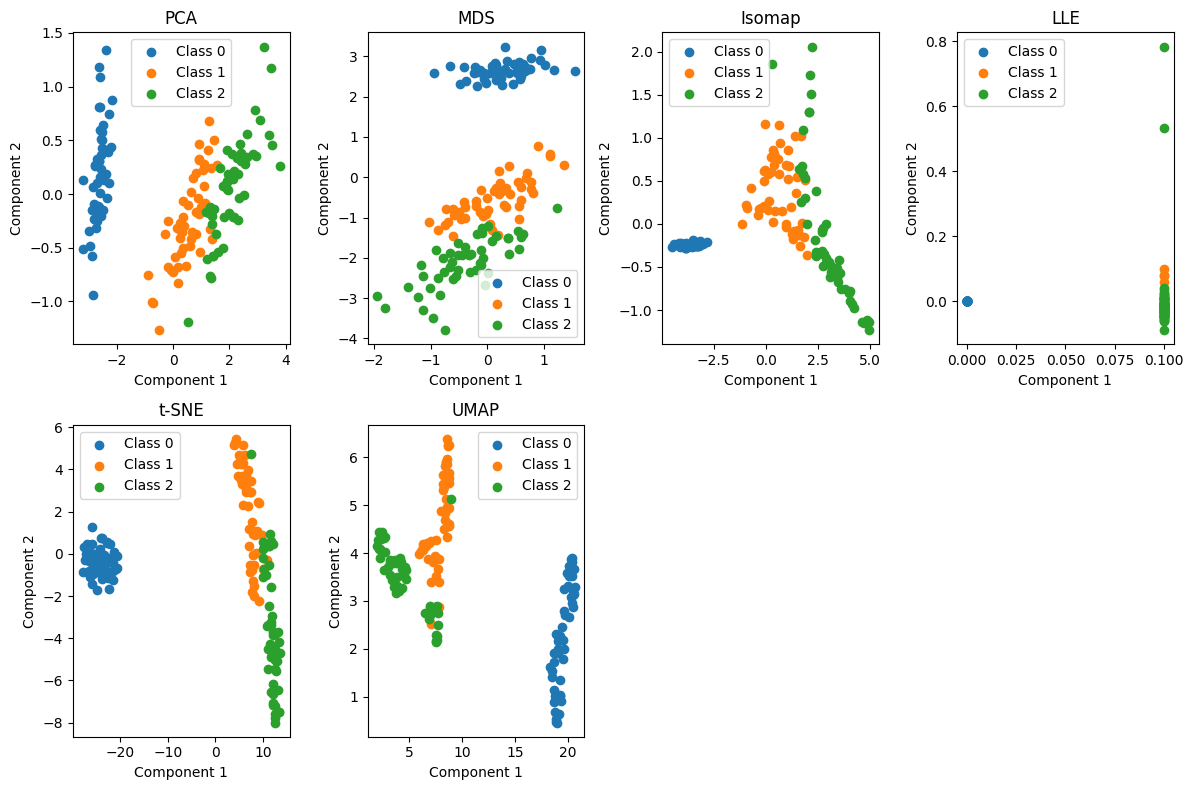

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
import torch
import torch.nn as nn
import torch.optim as optim
import umap.umap_ as UMAP
import matplotlib.pyplot as plt

def perform_dimensionality_reduction(X, method, n_components=2, **kwargs):
    # 次元削減手法を選択し、適用する関数
    if method == 'PCA':
        reducer = PCA(n_components=n_components)  # 主成分分析(PCA)
    elif method == 'MDS':
        reducer = MDS(n_components=n_components)  # 多次元尺度構成法(MDS)
    elif method == 'Isomap':
        reducer = Isomap(n_components=n_components)  # Isomap
    elif method == 'LLE':
        reducer = LocallyLinearEmbedding(n_components=n_components)  # 局所線形埋め込み(LLE)
    elif method == 't-SNE':
        reducer = TSNE(n_components=n_components)  # t-SNE
    elif method == 'UMAP':
        reducer = UMAP.UMAP(n_components=n_components)  # UMAP
    else:
        raise ValueError(f"Unknown dimensionality reduction method: {method}")

    return reducer.fit_transform(X)

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(4, 8),  # 入力層から隠れ層へ
            nn.ReLU(),        # ReLU活性化関数
            nn.Linear(8, 2)   # 隠れ層からコード層へ
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 8),  # コード層から隠れ層へ
            nn.ReLU(),        # ReLU活性化関数
            nn.Linear(8, 4)   # 隠れ層から出力層へ
        )

    def forward(self, x):
        x = self.encoder(x)  # エンコード処理
        x = self.decoder(x)  # デコード処理
        return x

def train_autoencoder(X, model, epochs=50, batch_size=32):
    dataset = torch.tensor(X, dtype=torch.float32)  # データセットをテンソルに変換
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)  # データローダの設定
    criterion = nn.MSELoss()  # 損失関数としてMSEを使用
    optimizer = optim.Adam(model.parameters(), lr=0.01)  # 最適化アルゴリズムとしてAdamを使用

    # 訓練ループ
    for epoch in range(epochs):
        for data in dataloader:
            optimizer.zero_grad()  # 勾配を0で初期化
            reconstruction = model(data)  # データを通じて再構成
            loss = criterion(reconstruction, data)  # 損失の計算
            loss.backward()  # 勾配の計算
            optimizer.step()  # パラメータの更新

    encoded_data = model.encoder(dataset).detach().numpy()  # エンコーダの出力を取得し、Numpy配列に変換
    return encoded_data

def plot_results(X_reduced_list, y, methods):
    plt.figure(figsize=(12, 8))  # 図のサイズを指定

    # 結果を一つずつプロット
    for i, (method, X_reduced) in enumerate(zip(methods, X_reduced_list), 1):
        plt.subplot(2, 4, i)
        for label in np.unique(y):
            plt.scatter(X_reduced[y == label, 0], X_reduced[y == label, 1], label=f'Class {label}')  # ラベルごとに色を変えてプロット
        plt.title(f'{method}')  # サブプロットのタイトル
        plt.xlabel('Component 1')  # X軸ラベル
        plt.ylabel('Component 2')  # Y軸ラベル
        plt.legend()  # 凡例の表示

    plt.tight_layout()  # レイアウトの調整
    plt.show()

def main():
    iris = load_iris()  # Irisデータセットの読み込み
    X = iris.data
    y = iris.target

    #methods = ['PCA', 'MDS', 'Isomap', 'LLE', 't-SNE', 'UMAP']

    autoencoder = Autoencoder()  # オートエンコーダモデルのインスタンス化
    X_autoencoder = train_autoencoder(X, autoencoder)  # オートエンコーダでの学習
    plot_results([X_autoencoder],y,["Autoencoder"])

if __name__ == '__main__':
    main()



(128, 1424) 128
(20, 1424) 20
(12, 1424) 12
(45,) 45
(1225,) 1225
(1025, 1424) 1025
(7350, 1424)


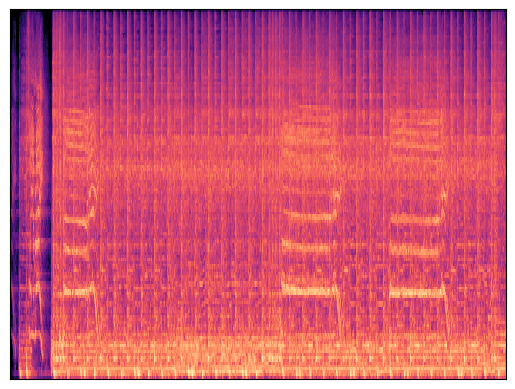

<Figure size 1200x400 with 0 Axes>

<Figure size 2500x500 with 0 Axes>

In [ ]:
import csv
import numpy as np
import math

import librosa
import librosa.display

import matplotlib.pyplot as plt


DATA_DIR_PATH = '/content/PMEmo2019'

def sprint(c):
  print(c.shape,len(c))


def sprints(*cs):
  print(*[c.shape for c in cs])


def repeat_expand(data, target_shape):
    rows, cols = target_shape
    if len(data.shape) == 1:
        data = data[:, np.newaxis]
    orig_rows, orig_cols = data.shape
    row_indices = np.floor(np.linspace(0, orig_rows, rows, endpoint=False)).astype(int)
    col_indices = np.floor(np.linspace(0, orig_cols, cols, endpoint=False)).astype(int)
    expanded_data = data[row_indices][:, col_indices]

    return expanded_data

def unify_shapes(*datasets):
    # 各データの行数と列数を比較して、最大の形状を決定
    max_rows = max([data.shape[0] for data in datasets])
    max_cols = max([data.shape[1] if len(data.shape) > 1 else 1 for data in datasets])

    # 全てのデータの形状を最大の形状に揃える
    expanded_datasets = [repeat_expand(data, (max_rows, max_cols)) for data in datasets]

    return expanded_datasets


def loadDataPack(id):
  edaPath = f"{DATA_DIR_PATH}/EDA/{id}_EDA.csv"
  edaReader = csv.DictReader(edaPath)

  soundPath = f"{DATA_DIR_PATH}/chorus/{id}.mp3"
  #print(soundPath)
  y, sr = librosa.load(soundPath)
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
  mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
  sprint(mel_spectrogram)
  librosa.display.specshow(mel_spectrogram,sr=sr)
  #リズム

  #librosa.display.waveshow(y=y, sr=sr, color='blue')
  #/content/PMEmo2019/chorus/101.mp3
  #/content/PMEmo2019/chorus/100.mp3
  n_mfcc = 20
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, dct_type=3)
  sprint(mfcc) #音色
  #print(mfcc)

  C = librosa.feature.chroma_cqt(y=y, sr=sr)
  plt.figure(figsize=(12,4))
  sprint(C) #和音


  rms = librosa.feature.rms(y=y, hop_length=16250)[0]
  rms /= np.max(rms) #正規化
  sprint(rms) #音圧
  #print(rms)

  #times = np.floor(librosa.times_like(rms, hop_length=16250, sr=sr))

  #plt.figure(figsize=(12, 4))
  #plt.plot(rms)


  spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
  spectral_centroid = np.convolve(spectral_centroid, np.ones(200)/200, mode='valid')

  sprint(spectral_centroid) #音程

  stft_result = librosa.stft(y)
  abs_result = np.abs(stft_result)
  power_spec = librosa.amplitude_to_db(abs_result, ref=np.max)

  plt.figure(figsize=(25,5))

  sprint(power_spec) #構成(フーリエ変換)/ 準候補

  resized_data = unify_shapes(mel_spectrogram,mfcc,C,rms,spectral_centroid,power_spec)

  Integrated_feature = np.vstack(resized_data)
  # 結果を表示
  print(Integrated_feature.shape)

loadDataPack(50)

(128, 1424) 128
(20, 1424) 20
(12, 1424) 12
(45,) 45
(1225,) 1225
(1025, 1424) 1025
(7350, 1424)


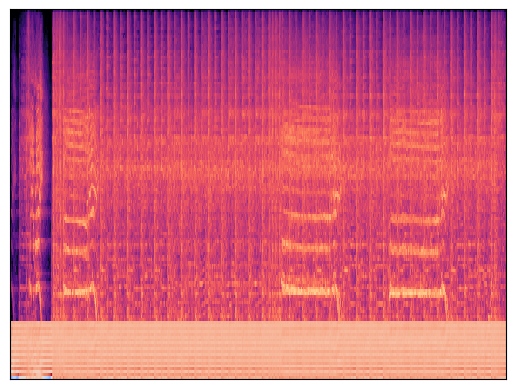

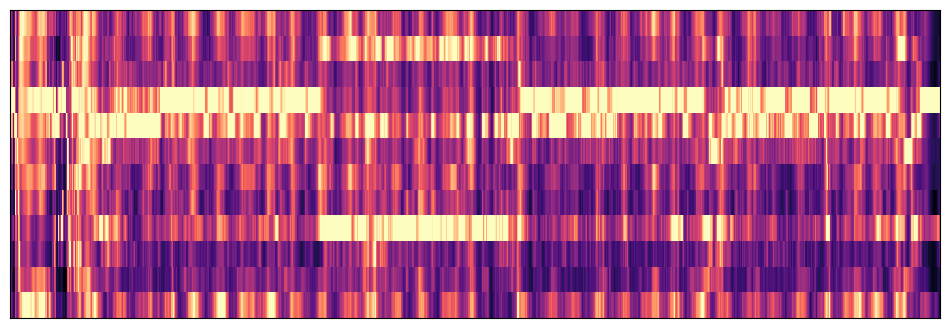

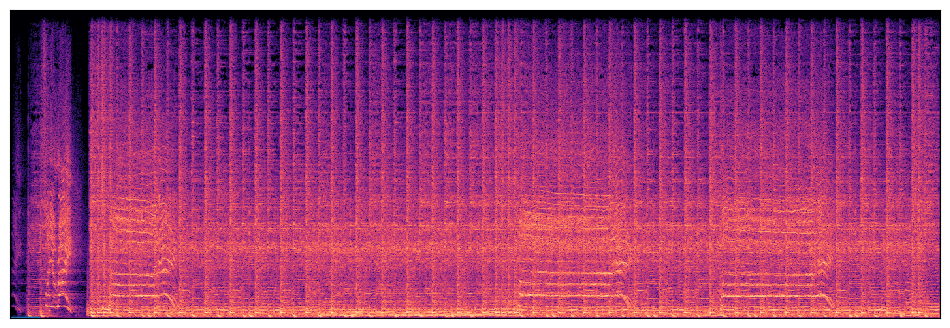

In [ ]:
import csv
import numpy as np
import math

import librosa
import librosa.display

import matplotlib.pyplot as plt


DATA_DIR_PATH = '/content/PMEmo2019'

def sprint(c):
  print(c.shape,len(c))


def sprints(*cs):
  print(*[c.shape for c in cs])


def repeat_expand(data, target_shape):
    rows, cols = target_shape
    if len(data.shape) == 1:
        data = data[:, np.newaxis]
    orig_rows, orig_cols = data.shape
    row_indices = np.floor(np.linspace(0, orig_rows, rows, endpoint=False)).astype(int)
    col_indices = np.floor(np.linspace(0, orig_cols, cols, endpoint=False)).astype(int)
    expanded_data = data[row_indices][:, col_indices]

    return expanded_data

def unify_shapes(*datasets):
    # 各データの行数と列数を比較して、最大の形状を決定
    max_rows = max([data.shape[0] for data in datasets])
    max_cols = max([data.shape[1] if len(data.shape) > 1 else 1 for data in datasets])

    # 全てのデータの形状を最大の形状に揃える
    expanded_datasets = [repeat_expand(data, (max_rows, max_cols)) for data in datasets]

    return expanded_datasets


def loadDataPack(id):
  edaPath = f"{DATA_DIR_PATH}/EDA/{id}_EDA.csv"
  edaReader = csv.DictReader(edaPath)

  soundPath = f"{DATA_DIR_PATH}/chorus/{id}.mp3"
  #print(soundPath)
  y, sr = librosa.load(soundPath)
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
  mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
  sprint(mel_spectrogram)
  librosa.display.specshow(mel_spectrogram,sr=sr)
  #?

  n_mfcc = 20
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, dct_type=3)
  sprint(mfcc) #音色

  librosa.display.specshow(mfcc,sr=sr)

  chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
  plt.figure(figsize=(12,4))
  sprint(chroma_cqt) #和音


  librosa.display.specshow(chroma_cqt,sr=sr)


  rms = librosa.feature.rms(y=y, hop_length=16250)[0]
  rms /= np.max(rms) #正規化
  sprint(rms) #音圧

  #librosa.display.specshow(rms,sr=sr)

  #times = np.floor(librosa.times_like(rms, hop_length=16250, sr=sr))

  plt.figure(figsize=(12, 4))
  plt.plot(rms)


  spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
  spectral_centroid = np.convolve(spectral_centroid, np.ones(200)/200, mode='valid')

  sprint(spectral_centroid) #音程

  stft_result = librosa.stft(y)
  abs_result = np.abs(stft_result)
  power_spec = librosa.amplitude_to_db(abs_result, ref=np.max)

  #plt.figure(figsize=(25,5))

  #sprint(power_spec) #構成(フーリエ変換)/ 準候補
  #librosa.display.specshow(power_spec,sr=sr)

  resized_data = unify_shapes(mel_spectrogram,mfcc,chroma_cqt,rms,spectral_centroid,power_spec)

  Integrated_feature = np.vstack(resized_data)

  #librosa.display.specshow(Integrated_feature)
  # 結果を表示
  print(Integrated_feature.shape)

loadDataPack(50)

(128, 1725) 128
(20, 1725) 20
(12, 1725) 12
(55,) 55
(1526,) 1526
(4578, 1725)


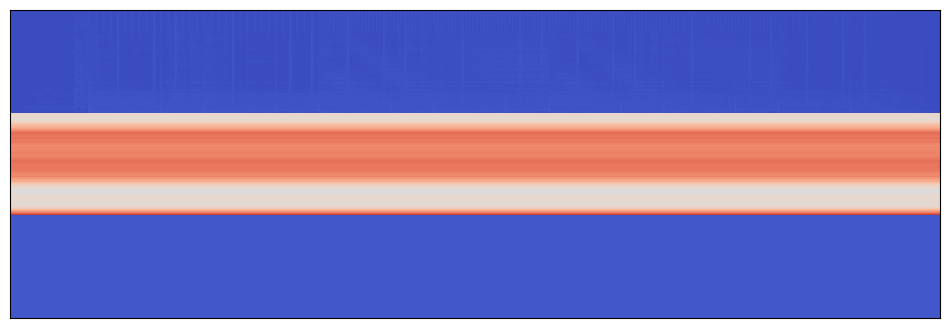

In [ ]:
import csv
import numpy as np
import math

import librosa
import librosa.display

import matplotlib.pyplot as plt


DATA_DIR_PATH = '/content/PMEmo2019'

def sprint(c):
  print(c.shape,len(c))


def sprints(*cs):
  print(*[c.shape for c in cs])


def repeat_expand(data, target_shape):
    rows, cols = target_shape
    if len(data.shape) == 1:
        data = data[:, np.newaxis]
    orig_rows, orig_cols = data.shape
    row_indices = np.floor(np.linspace(0, orig_rows, rows, endpoint=False)).astype(int)
    col_indices = np.floor(np.linspace(0, orig_cols, cols, endpoint=False)).astype(int)
    expanded_data = data[row_indices][:, col_indices]

    return expanded_data

def unify_shapes(*datasets):
    # 各データの行数と列数を比較して、最大の形状を決定
    max_rows = max([data.shape[0] for data in datasets])
    max_cols = max([data.shape[1] if len(data.shape) > 1 else 1 for data in datasets])

    # 全てのデータの形状を最大の形状に揃える
    expanded_datasets = [repeat_expand(data, (max_rows, max_cols)) for data in datasets]

    return expanded_datasets

def unify_liner(*datasets):



def loadDataPack(id):
  edaPath = f"{DATA_DIR_PATH}/EDA/{id}_EDA.csv"
  edaReader = csv.DictReader(edaPath)

  soundPath = f"{DATA_DIR_PATH}/chorus/{id}.mp3"
  #print(soundPath)
  y, sr = librosa.load(soundPath)
  S = librosa.feature.melspectrogram(y=y, sr=sr)
  S = librosa.power_to_db(S, ref=np.max)
  sprint(S)
  #librosa.display.specshow(mel_spectrogram,sr=sr)
  #?

  n_mfcc = 20
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, dct_type=3)
  sprint(mfcc) #音色

  #librosa.display.specshow(mfcc,sr=sr)

  chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
  plt.figure(figsize=(12,4))
  sprint(chroma_cqt) #和音


 # librosa.display.specshow(chroma_cqt,sr=sr)


  rms = librosa.feature.rms(y=y, hop_length=16250)[0]
  rms /= np.max(rms) #正規化
  sprint(rms) #音圧

  #librosa.display.specshow(rms,sr=sr)

  #times = np.floor(librosa.times_like(rms, hop_length=16250, sr=sr))

  #plt.figure(figsize=(12, 4))
  #plt.plot(rms)


  spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
  spectral_centroid = np.convolve(spectral_centroid, np.ones(200)/200, mode='valid')

  sprint(spectral_centroid) #音程

  #stft_result = librosa.stft(y)
  #abs_result = np.abs(stft_result)
  #power_spec = librosa.amplitude_to_db(abs_result, ref=np.max)

  #plt.figure(figsize=(25,5))

  #sprint(power_spec) #構成(フーリエ変換)/ 準候補
  #librosa.display.specshow(power_spec,sr=sr)

  resized_data = unify_shapes(,S)

  Integrated_linerFeature = np.vstack(rms,spectral_centroid)

  librosa.display.specshow(Integrated_feature)
  # 結果を表示
  print(Integrated_feature.shape)

loadDataPack(100)

n_fft = 時間
sr = 周波数, 2の累乗

# 新しいセクション

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.12
albumentations                   1.4.12
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.7.29.0.32.7
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                 

In [11]:
import os
import random
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn import preprocessing
import IPython.display as ipd

In [145]:
base_dir = '/content/PMEmo2019'

SAMPLE_RATE = 21504#22050
FFT_SIZE = 2048

meta_data = pd.read_csv(base_dir+'/metadata.csv')
data_size = meta_data.shape[0]

annotations = pd.read_csv(base_dir+
                '/annotations/dynamic_annotations.csv',
        header=0,names=['id','time','arousal','valence'])

freq = int(FFT_SIZE/4)

discardLength = int(15 * SAMPLE_RATE/freq)
packLength = int(0.5 * SAMPLE_RATE/freq)

maxDuration = int(88.24-15) #colab側でデータを直接大きい順に並べ替えて調べた。
maxSampleLength = maxDuration * SAMPLE_RATE
maxDimension = int(np.ceil(maxSampleLength/freq))

maxNumLabel = int(int(88.24-15)/0.5)

numMusic = len(meta_data.musicId)

time = maxDimension

print(maxDimension)

print(data_size,maxDimension)

3066
794 3066


In [128]:
# load a wave data
def load_wave_data(id):
    file_path = f"{base_dir}/chorus/{id}.mp3"
    x, fs = librosa.load(file_path, sr=SAMPLE_RATE)
    return x,fs

# change wave data to mel-stft
def calculate_melsp(x, n_fft=FFT_SIZE, hop_length=int(FFT_SIZE/4)):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=FFT_SIZE/4)
    return melsp

def zero_padding_v(melsp):
  lack = maxDimension-len(melsp)
  for i in range(lack):
    np.append(melsp,np.zeros(freq))
  return melsp

def load_input_data(id):
  _x, fs = load_wave_data(id)
  _x = calculate_melsp(_x)
  _x = np.transpose(_x)
  surplusLength = int(len(_x)%packLength)
  _x = _x[discardLength:-surplusLength:]
  _x = zero_padding_v(_x)
  result = np.zeros(maxDimension*freq).reshape(maxNumLabel,packLength,freq)
  i = 0
  ii = 0

  for t in _x:
    if ii >= packLength:
      ii = 0
      i+=1
    result[i][ii] = t
    ii+=1

  return result
#print(load_input_data(788)[0].shape,maxNumLabel)

# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

# display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    plt.colorbar()
    plt.show()

def repeat_expand(data, target_shape):
    rows, cols = target_shape
    if len(data.shape) == 1:
        data = data[:, np.newaxis]
    orig_rows, orig_cols = data.shape
    row_indices = np.floor(np.linspace(0, orig_rows, rows, endpoint=False)).astype(int)
    col_indices = np.floor(np.linspace(0, orig_cols, cols, endpoint=False)).astype(int)
    expanded_data = data[row_indices][:, col_indices]

    return expanded_data

#def zero_padding2(melsp):

def zero_padding_h(melsp):
    for i,band in enumerate(melsp):
      lack = maxDimension - len(band)
      melsp[i] = np.append(band,np.zeros(lack))#1次元になる
    return melsp

def split_annotation(startId,endId,length):
  startId = int(startId)
  endId = int(endId)
  ids = annotations.id
  arousal = annotations.arousal
  valence = annotations.valence
  p = 0
  pp = 0
  result = np.zeros(length*maxNumLabel*2).reshape(
      length,maxNumLabel,2)

  now_id = startId
  enable = False
  for i, id in enumerate(ids):
    id = int(id)
    if id == startId and not enable:
      enable = True

    if enable:
      if id != now_id :
        if now_id == endId:
          enable = False
        now_id = id
        p += 1
        pp = 0

    if enable:
      result[p][pp][0] = arousal[i]
      result[p][pp][1] = valence[i]
      pp += 1
  return result
#print(split_annotation(732,1000,199).shape)

# example data

def start(id):
  x, fs = load_wave_data(id)
  melsp = calculate_melsp(x)
  print("wave size:{0}\nmelsp size:{1}\nsamping rate:{2}".format(x.shape, melsp.shape, fs))
  show_wave(x)
  show_melsp(melsp, fs)


In [ ]:
# data augmentation: add white noise
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

# data augmentation: shift sound in timeframe
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

# data augmentation: stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

In [114]:
# get training dataset and target dataset
x = [id for id in meta_data.musicId]
y = [id for id in meta_data.musicId]
print(len(x),len(y))

x_train, x_test, y_train, y_test = model_selection.train_test_split(
x, y, test_size=0.25, shuffle=False)
#stratify=y は複数同じラベルがあるときなどに使うもの
print("x train:{0}\ny train:{1}\nx test:{2}\ny test:{3}".format(len(x_train),
                                                                len(y_train),
                                                                len(x_test),
                                                                len(y_test)))

# showing the classes are equally splitted
#a = np.zeros(50)
#for c in y_test:
#    a[c] += 1
#print(a)


794 794
x train:595
y train:595
x test:199
y test:199


In [133]:
# save wave data in npz, with augmentation
def save_np_data(filename, x, y, aug=None, rates=None):
#    np_data = np.zeros(freq*time*len(x)).reshape(len(x), freq, time)
    np_data = np.zeros(len(x)*time*freq).reshape(
      len(x),maxNumLabel,packLength, freq)
    np_targets = split_annotation(y[0],y[-1],len(y))
    for i in range(len(y)):
        _x = load_input_data(x[i])
        np_data[i] = _x
        print(i)
    np.savez(filename, x=np_data, y=np_targets)

# save test dataset
if not os.path.exists("pmemo_melsp_test.npz"):
    print('test')
    save_np_data("pmemo_melsp_test.npz", x_test,  y_test)

# save raw training dataset
if not os.path.exists("pmemo_melsp_train_raw.npz"):
    print('raw')
    save_np_data("pmemo_melsp_train_raw.npz", x_train,  y_train)

In [140]:


print(x_train['x'].shape)

(199, 146, 21, 512)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam

train_data = np.load('/content/pmemo_melsp_train_raw.npz')
x_train = train_data['x']
y_train = train_data['y']

# モデルの構築
model = Sequential()
model.add(TimeDistributed(LSTM(64, return_sequences=True),
              input_shape=(maxNumLabel,packLength,freq)))
model.add(TimeDistributed(LSTM(32, return_sequences=False)))
model.add(TimeDistributed(Dense(16, activation='relu')))
model.add(TimeDistributed(Dense(2)))  # 出力層

# モデルのコンパイル
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# モデルのトレーニング
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)



In [ ]:

test_data = np.load('/content/pmemo_melsp_test.npz')
x_test = test_data['x']
y_test = test_data['y']


loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

# 感情データの予測
predictions = model.predict(X_test)

In [144]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam

train_data = np.load('/content/pmemo_melsp_train_raw.npz')

validation_split = 0.2

x_train = train_data['x']
y_train = train_data['y']

# モデルの構築
model = Sequential()
model.add(TimeDistributed(LSTM(64, return_sequences=True), input_shape=x_train.shape))
model.add(TimeDistributed(LSTM(32, return_sequences=False)))
model.add(TimeDistributed(Dense(16, activation='relu')))
model.add(TimeDistributed(Dense(2)))  # 出力層

# モデルのコンパイル
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


# カスタムトレーニングループ
epochs = 50
batch_size = 1  # 曲単位でバッチ処理

for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')

    # 曲単位でシャッフル
    indices = np.arange(len(x_train))
    np.random.shuffle(indices)
    x_train = x_train[indices]
    y_train = y_train[indices]

    # ミニバッチでのトレーニング
    for i in range(0, len(x_train), batch_size):
        x_trainx_train = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        model.train_on_batch(x_train, y_batch)

    # エポック終了時の評価
    train_loss = model.evaluate(x_train, y_train, verbose=0)
    val_loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'Train Loss: {train_loss} - Validation Loss: {val_loss}')

# 最終評価
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# 感情データの予測
predictions = model.predict(X_test)
print(predictions)

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time, freq)))  # LSTM層。`return_sequences=True`が次層に全タイムステップの隠れ状態を渡すために重要
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=10, batch_size=2)

# 予測
X_test = np.random.rand(5, 100, 4)  # 新しい音データの例
predictions = model.predict(X_test)

In [ ]:
#test = np.zeros(3*2*5).reshape(3, 2,5)
#print(test)
#print(test.shape)

meta_data = pd.read_csv(base_dir+'/metadata.csv',index_col=0)
data_size = meta_data.shape[0]
print(meta_data.fileName)

musicId
1          1.mp3
4          4.mp3
5          5.mp3
6          6.mp3
7          7.mp3
          ...   
993      993.mp3
996      996.mp3
997      997.mp3
999      999.mp3
1000    1000.mp3
Name: fileName, Length: 794, dtype: object


In [ ]:

def x(id):
  DATA_DIR_PATH = '/content/PMEmo2019'
  soundPath = f"{DATA_DIR_PATH}/chorus/{id}.mp3"
  #print(soundPath)
  y, sr = librosa.load(soundPath)
  print(sr)
x(50);x(60);x(61);x(65)

22050
22050
22050
22050


In [8]:
a = np.random.rand(2, 5)
print(a)
a = np.transpose(a)
print(a)

[[0.45472685 0.61673354 0.64525072 0.23839207 0.34310516]
 [0.3131913  0.39996282 0.264023   0.64431462 0.91381941]]
[[0.45472685 0.3131913 ]
 [0.61673354 0.39996282]
 [0.64525072 0.264023  ]
 [0.23839207 0.64431462]
 [0.34310516 0.91381941]]


In [10]:
#a = [ [0.1,0.8,0.3,0]
#[0,10,5.7,-1.6]
#[0.2,2,1.4,-0.5] ]
a = [  [0, 0.1, 0.9, 1.2, 1.2],
  [0, 0, 10.0, 15.7, 14.1],
  [3, 3.2, 5.2, 6.6, 6.1]]

a2 = []
for line in a:
  res = []
  for i in range(len(i)-1):
    res.append(a[i+1] - a[i])
  a2.append(res)


b = [0,0,0,0]
for line in a2:
  m = max(line)

  for i,v in enumerate(line)
    b[i] += v/m
print([_/3 for _ in b])



print()
print([a/10 for a in [0,10,5.7,-1.6] ])
print([a/2 for a in [0.2,2,1.4,-0.5] ])




SyntaxError: expected ':' (<ipython-input-10-383b53b02b91>, line 20)

In [ ]:

import pandas as pd

meta_data = pd.read_csv(base_dir+'/metadata.csv')
data_size = meta_data.shape[0]

y = [f"{id}_EDA.csv" for id in meta_data.musicId]

def open_EDA(id):
  #先に平均を求めてから正規化->皮膚の感度が低い人のデータが軽視される
  #正規化してから、平均を求める->

  sampleLength = meta_data.duration[id] * SAMPLE_RATE
  sampleDimension = np.ceil(maxSampleLength/(FFT_SIZE/4)) #タイムスタンプの数

  eda_data = pd.read_csv(base_dir+f'EDA/${id}_EDA.csv')
  keys = meta_data.keys()
  del keys[0]#time と書かれたキーを削除

  for key in keys:
    datum = eda_data[key]#各被験者のデータ
    max_val = max(datum)
    min_val = min(datum)
    range = max_val-min_val
    for i,val in enumerate(datum):#正規化大事!!
      result[i] += (val-min_val)/range
  for i, v in enumerate(result):
    result[i] = v/participantsCount;

  eda_data = repeat_expand(eda_data, (1,sampleDimension))


最大の偏差を求める。


・曲のサビなどその曲のほかの部分と比べて特徴的な部分を検出したい
・ある曲とほかの曲との違いも分かるようにしたい
・外れ値による影響を少なくしたい。

・平均ー＞中央値を使う
・分散をそろえない

・被験者間のスケールをそろえたい
・複数の被験者の結果を１つにしたい

ー＞被験者ごとに正規化して合計する（０＝最大値ー１＝最小値）

ー＞正規化前の全被験者の平均をほかの曲の平均と比べ、値の変化の中心のほかの曲との位置関係を調べる

ー＞標準偏差をほかの曲のものとくらべ、変化具合のほかの曲との差を調べる

：曲のよって被験者が違うので平均同士を比べた時に正確な値が得られるか



In [ ]:
def open_EDA(id):
  #先に平均を求めてから正規化->皮膚の感度が低い人のデータが軽視される
  #正規化してから、平均を求める->

  sampleLength = meta_data.duration[id] * SAMPLE_RATE
  sampleDimension = np.ceil(maxSampleLength/(FFT_SIZE/4)) #タイムスタンプの数

  eda_data = pd.read_csv(base_dir+f'EDA/${id}_EDA.csv')
  keys = meta_data.keys()
  del keys[0]#time と書かれたキーを削除

  participantsCount = len(keys)
  result = np.zeros(sampleDimension)

  for key in keys:
    datum = eda_data[key]#各被験者のデータ
    max_val = max(datum)
    min_val = min(datum)
    range = max_val-min_val
    for i,val in enumerate(datum):#正規化大事!!
      result[i] += (val-min_val)/range
  for i, v in enumerate(result):
    result[i] = v/participantsCount;

  eda_data = repeat_expand(eda_data, (1,sampleDimension))


  return eda_data

In [54]:
import librosa
import soundfile as sf

orig_sr = 22050
target_sr = 1024

wav, sr = librosa.load("/content/PMEmo2019/chorus/1000.mp3",
                       sr=orig_sr)
print(wav,sr)
resampled_wav = librosa.resample(wav,
      orig_sr=orig_sr, target_sr=target_sr)
print(sf.available_subtypes('MP3'))
sf.write('00.wav', resampled_wav, target_sr, subtype="PCM_24")

[ 3.2526065e-19 -3.6591823e-19  1.6263033e-19 ...  4.7933327e-07
 -8.8237084e-07  3.9940187e-07] 22050
{'MPEG_LAYER_I': 'MPEG Layer I', 'MPEG_LAYER_II': 'MPEG Layer II', 'MPEG_LAYER_III': 'MPEG Layer III'}


In [142]:

b = np.array([0,1,2,3,4])
indices = np.arange(len(b))
np.random.shuffle(indices)
b = b[indices]
print(b)

[4 0 1 2 3]
